In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Export df
df_final_demo = pd.read_csv('df_final_demo.txt')
df_final_experiment_clients = pd.read_csv('df_final_experiment_clients.txt')
df_final_web_data_pt_1 = pd.read_csv('df_final_web_data_pt_1.txt')
df_final_web_data_pt_2 = pd.read_csv('df_final_web_data_pt_2.txt')

In [142]:
df_final_demo.sort_values(by='client_id').head(3)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
59771,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0
40126,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
1532,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0


In [143]:
df_final_experiment_clients.sort_values(by='client_id').head(3)

,client_id,Variation
58722,169,NaN
14753,555,Test
28357,647,Test


In [144]:
df_final_web_data_pt_1.sort_values(by='client_id').head(3)

,client_id,visitor_id,visit_id,process_step,date_time
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09


In [145]:
df_final_web_data_pt_2.sort_values(by='client_id').head(3)

,client_id,visitor_id,visit_id,process_step,date_time
285190,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01 07:42:43
285315,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01 07:26:55
99715,546,475037402_89828530214,731811517_9330176838_94847,step_1,2017-06-17 10:03:39


In [146]:
df_concat_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], axis=0)
df_concat_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [147]:
df_steps_variation = pd.merge(df_concat_web_data, df_final_experiment_clients, on='client_id', how='inner')
df_steps_variation

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,NaN
449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,NaN
449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,NaN
449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,NaN


In [148]:
df_final = pd.merge(df_steps_variation, df_final_demo, on='client_id', how='left')
df_final

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,NaN,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0
449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,NaN,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0
449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,NaN,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0
449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,NaN,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0


In [149]:
# Filtrar por los clientes que han hecho "test" o "control"
df_final_filtered = df_final[df_final['Variation'].notna()]
df_final_filtered

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417650,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0
417651,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
417652,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
417653,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0


In [150]:
df_final_filtered['gendr'].unique()

array(['U', 'M', 'F', nan, 'X'], dtype=object)

In [151]:
df_final_filtered['gendr'].value_counts()

gendr
U    108884
M    108013
F    104302
X         8
Name: count, dtype: int64

In [152]:
df_final_filtered.isna().sum()

client_id             0
visitor_id            0
visit_id              0
process_step          0
date_time             0
Variation             0
clnt_tenure_yr      102
clnt_tenure_mnth    102
clnt_age            114
gendr               102
num_accts           102
bal                 102
calls_6_mnth        102
logons_6_mnth       102
dtype: int64

In [153]:
df_final_filtered.dropna(inplace=True)
df_final_filtered.isna().sum()

C:\Users\eslab\AppData\Local\Temp\ipykernel_26460\730768738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_filtered.dropna(inplace=True)


client_id           0
visitor_id          0
visit_id            0
process_step        0
date_time           0
Variation           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [154]:
# Convert float to int
df_final_filtered['logons_6_mnth'] = df_final_filtered['logons_6_mnth'].astype(int)

C:\Users\eslab\AppData\Local\Temp\ipykernel_26460\3439150681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_filtered['logons_6_mnth'] = df_final_filtered['logons_6_mnth'].astype(int)


In [155]:
df_final_filtered['gendr'] = df_final_filtered['gendr'].replace(['X'], ['U'])
df_final_filtered['gendr'].value_counts()

C:\Users\eslab\AppData\Local\Temp\ipykernel_26460\4168608941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_filtered['gendr'] = df_final_filtered['gendr'].replace(['X'], ['U'])


gendr
U    108892
M    108013
F    104290
Name: count, dtype: int64

In [156]:
df_final_filtered['Variation'].unique()

array(['Test', 'Control'], dtype=object)

In [157]:
df_final_filtered['process_step'].value_counts()

process_step
start      104041
step_1      68410
step_2      56855
step_3      48675
confirm     43214
Name: count, dtype: int64

C:\Users\eslab\AppData\Local\Temp\ipykernel_26460\2658395255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_filtered, x='process_step', palette="Set3");


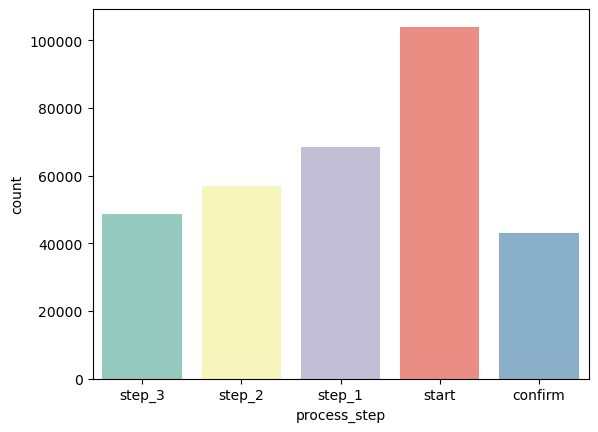

In [158]:
# Plotting a count plot for the 'MSZoning' column from the dataframe 'df', using the "Set3" palette for coloring
sns.countplot(data=df_final_filtered, x='process_step', palette="Set3");

C:\Users\eslab\AppData\Local\Temp\ipykernel_26460\1339763098.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_filtered, x='Variation', palette="Set3");


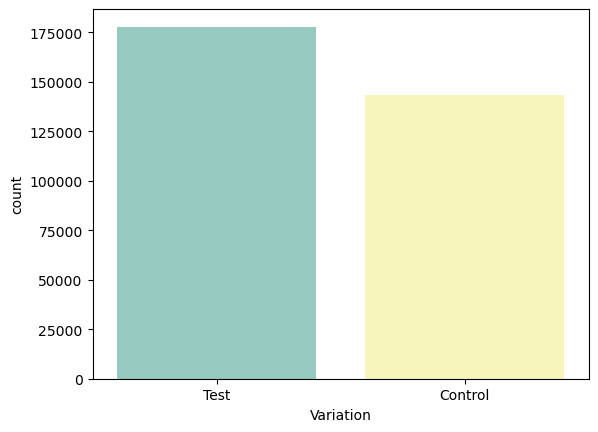

In [159]:
sns.countplot(data=df_final_filtered, x='Variation', palette="Set3");

## Numerical Variables


In [160]:
df_final_filtered.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,3.211950e+05,321195.000000,321195.000000,321195.000000,321195.000000,3.211950e+05,321195.000000,321195.000000
mean,5.009766e+06,12.176528,152.134818,48.553511,2.262962,1.622142e+05,3.236834,6.275082
std,2.872653e+06,6.963181,83.210462,15.645588,0.541536,3.494776e+05,2.193690,2.179757
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.514553e+06,6.000000,82.000000,34.500000,2.000000,4.105887e+04,1.000000,4.000000
50%,5.051667e+06,11.000000,138.000000,50.000000,2.000000,6.924195e+04,3.000000,6.000000
75%,7.468390e+06,16.000000,193.000000,61.000000,2.000000,1.514930e+05,6.000000,9.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


In [161]:
mean_month = df_final_filtered['clnt_tenure_mnth'].mean()
median_month = df_final_filtered['clnt_tenure_mnth'].median()
mode_month = df_final_filtered['clnt_tenure_mnth'].mode()[0]

mean_month, median_month, mode_month

(152.13481841249086, 138.0, 58.0)

In [162]:
# Measures of dispersion
variance_month = df_final_filtered['clnt_tenure_mnth'].var()
std_dev_month = df_final_filtered['clnt_tenure_mnth'].std()
min_month = df_final_filtered['clnt_tenure_mnth'].min()
max_month = df_final_filtered['clnt_tenure_mnth'].max()
range_month = max_month - min_month
quartiles_month = df_final_filtered['clnt_tenure_mnth'].quantile([0.25, 0.5, 0.75])

variance_month, std_dev_month, min_month, max_month, range_month, quartiles_month



(6923.981005120177,
 83.21046211336756,
 33.0,
 669.0,
 636.0,
 0.25     82.0
 0.50    138.0
 0.75    193.0
 Name: clnt_tenure_mnth, dtype: float64)

In [163]:
# Calculating skewness and kurtosis
skewness_month = df_final_filtered['clnt_tenure_mnth'].skew()
kurtosis_month = df_final_filtered['clnt_tenure_mnth'].kurtosis()

skewness_month, kurtosis_month

(1.0149608889921815, 0.8900514168971179)

<Axes: xlabel='clnt_tenure_mnth', ylabel='Count'>

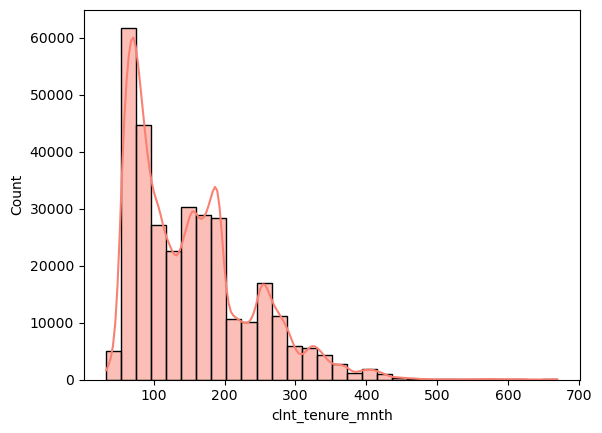

In [164]:
# Plotting a histogram for the 'SalePrice' column of the 'data' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(df_final_filtered['clnt_tenure_mnth'], kde=True, bins=30, color="salmon")

In [165]:
mean_age = df_final_filtered['clnt_age'].mean()
median_age = df_final_filtered['clnt_age'].median()
mode_age = df_final_filtered['clnt_age'].mode()[0]

mean_age, median_age, mode_age

(48.553511106959945, 50.0, 58.5)

In [166]:
variance_age = df_final_filtered['clnt_age'].var()
std_dev_age = df_final_filtered['clnt_age'].std()
min_age = df_final_filtered['clnt_age'].min()
max_age = df_final_filtered['clnt_age'].max()
range_age = max_age - min_age
quartiles_age = df_final_filtered['clnt_age'].quantile([0.25, 0.5, 0.75])

variance_age, std_dev_age, min_age, max_age, range_age, quartiles_age

(244.78442943469642,
 15.645588177971975,
 17.0,
 96.0,
 79.0,
 0.25    34.5
 0.50    50.0
 0.75    61.0
 Name: clnt_age, dtype: float64)

In [167]:
skewness_age = df_final_filtered['clnt_age'].skew()
kurtosis_age = df_final_filtered['clnt_age'].kurtosis()

skewness_age, kurtosis_age

(-0.012801806342837249, -0.9346229222661653)

<Axes: xlabel='clnt_age', ylabel='Count'>

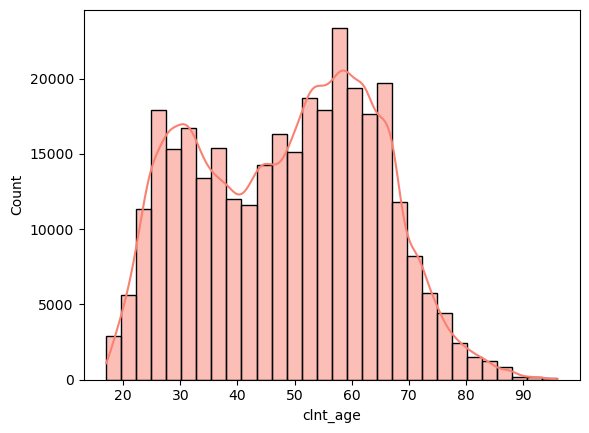

In [168]:
# Plotting a histogram for the 'SalePrice' column of the 'data' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(df_final_filtered['clnt_age'], kde=True, bins=30, color="salmon")

In [169]:
mean_logons_6_mnth = df_final_filtered['logons_6_mnth'].mean()
median_logons_6_mnth = df_final_filtered['logons_6_mnth'].median()
mode_logons_6_mnth = df_final_filtered['logons_6_mnth'].mode()[0]

mean_logons_6_mnth, median_logons_6_mnth, mode_logons_6_mnth

(6.2750821152259535, 6.0, 9)

In [170]:
variance_logons_6_mnth = df_final_filtered['logons_6_mnth'].var()
std_dev_logons_6_mnth = df_final_filtered['logons_6_mnth'].std()
min_logons_6_mnth = df_final_filtered['logons_6_mnth'].min()
max_logons_6_mnth = df_final_filtered['logons_6_mnth'].max()
range_logons_6_mnth = max_logons_6_mnth - min_logons_6_mnth
quartiles_logons_6_mnth = df_final_filtered['logons_6_mnth'].quantile([0.25, 0.5, 0.75])

variance_logons_6_mnth, std_dev_logons_6_mnth, min_logons_6_mnth, max_logons_6_mnth, range_logons_6_mnth, quartiles_logons_6_mnth

(4.751340684157521,
 2.1797570241101463,
 3,
 9,
 6,
 0.25    4.0
 0.50    6.0
 0.75    9.0
 Name: logons_6_mnth, dtype: float64)

In [171]:
skewness_logons_6_mnth = df_final_filtered['logons_6_mnth'].skew()
kurtosis_logons_6_mnth = df_final_filtered['logons_6_mnth'].kurtosis()

skewness_logons_6_mnth, kurtosis_logons_6_mnth

(-0.06516227623765022, -1.439449506872893)

<Axes: xlabel='logons_6_mnth', ylabel='Count'>

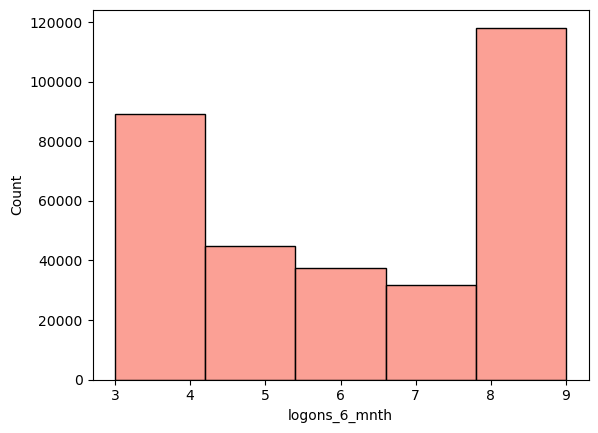

In [177]:
# Plotting a histogram for the 'SalePrice' column of the 'data' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(df_final_filtered['logons_6_mnth'], bins = 5, color="salmon")

In [174]:
crosstab_result = pd.crosstab(df_final_filtered['Variation'], df_final_filtered['process_step'])
crosstab_result


process_step,confirm,start,step_1,step_2,step_3
Variation,,,,,
Control,17498,47589,29657,25877,22787
Test,25716,56452,38753,30978,25888
